# Apple Plant Disease Image Computer Vision Recognition

Name: Ferry Marcellus Suhendra

### Introduction

In order to increase productivity of agriculture field, automation of plant disease recognition is important to quickly find and treat plant disease. common, manual method of locating plant disease in the field is unreliable and time consuming. most of plant disease known to hit agricultural plant can be seen from its leaf and can result in major economic loss. Kashmir is a well known for its apple production in India and for this computer vision modeling we will be using image samples taken from the Kashmir apple plantations.

#### Problem

Create a computer vision algorithm that can identify plant disease to increase plantation productivity.

### Import Libraries

In [1]:
import os
import glob
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
np.random.seed(32)
tf.random.set_seed(32)

### Data Loading

The image set used in this modeling are apple leaf sample images taken from Kashmir apple plantation containing the following images:

1. Healthy leaves
2. Leaves with apple rot disease
3. Leaves with blotch disease
4. Leaves with scabs

dataset url: https://www.kaggle.com/datasets/hsmcaju/d-kap


In [ ]:
# connecting google colab runtime with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# fetching labels
labels=os.listdir('/content/drive/MyDrive/APPLE_DISEASE_DATASET')
labels

['LEAF BLOTCH', 'APPLE ROT LEAVES', 'SCAB LEAVES', 'HEALTHY LEAVES']

In [ ]:
# defining file path
main_path='/content/drive/MyDrive/APPLE_DISEASE_DATASET'

In [ ]:
# checking ammount of samples of each labels
print('image set: \n' + '='*50)
num_healthy= len(os.listdir(os.path.join(main_path, 'HEALTHY LEAVES')))
num_rot= len(os.listdir(os.path.join(main_path, 'APPLE ROT LEAVES')))
num_blotch= len(os.listdir(os.path.join(main_path, 'LEAF BLOTCH')))
num_scab= len(os.listdir(os.path.join(main_path, 'SCAB LEAVES')))
print(f'healthy ammount= {num_healthy}')
print(f'apple rot ammount= {num_rot}')
print(f'leaf blotch ammount= {num_blotch}')
print(f'scab leaves ammount= {num_scab}')

image set: 
healthy ammount= 46
apple rot ammount= 103
leaf blotch ammount= 111
scab leaves ammount= 168


In [ ]:
# fetching image data directory
main_healthy = glob.glob(main_path+"/HEALTHY LEAVES/*.jpeg")
main_rot = glob.glob(main_path+"/APPLE ROT LEAVES/*.jpeg")
main_blotch = glob.glob(main_path+"/LEAF BLOTCH/*.jpeg")
main_scab = glob.glob(main_path+"/SCAB LEAVES/*.jpeg")

In [ ]:
# Defining dataframe function
def create_dataframe(list_of_images):
    data = []
    for image in list_of_images:
        data.append((image, image.split('/')[5].split('\\')[0]))
    return pd.DataFrame(data, columns=['images', 'label'])

In [ ]:
# creating dataframe
df= create_dataframe(main_healthy + main_rot + main_blotch + main_scab)
df= df.sample(frac=1, random_state=1).reset_index(drop=True)

df.head()

,images,label
0,/content/drive/MyDrive/APPLE_DISEASE_DATASET/L...,LEAF BLOTCH
1,/content/drive/MyDrive/APPLE_DISEASE_DATASET/L...,LEAF BLOTCH
2,/content/drive/MyDrive/APPLE_DISEASE_DATASET/L...,LEAF BLOTCH
3,/content/drive/MyDrive/APPLE_DISEASE_DATASET/S...,SCAB LEAVES
4,/content/drive/MyDrive/APPLE_DISEASE_DATASET/A...,APPLE ROT LEAVES


### Exploratory Data Analysis

In [ ]:
# defining plot function
def visualize_data(dataframe, label):
    fig, ax = plt.subplots(figsize =(8, 5))
    ax = sns.countplot(x='label', data=dataframe, palette='Set2')
    ax.set_title('Data Distribution')
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    
    # Setting the label for x-axis
    plt.xlabel("Label", size=14)
    # Setting the label for y-axis
    plt.ylabel("count", size=14)
    plt.title(f"{label} Distribution", size=10)
    plt.show()

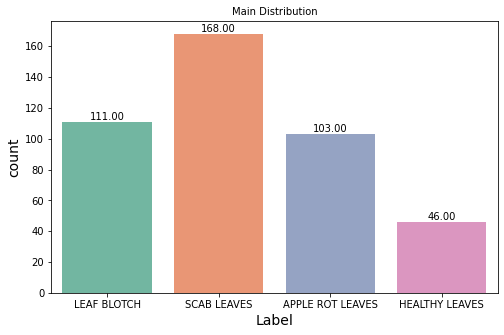

In [ ]:
# Visualizing data
visualize_data(df, 'Main')

The ammount of data are imbalanced across labels.

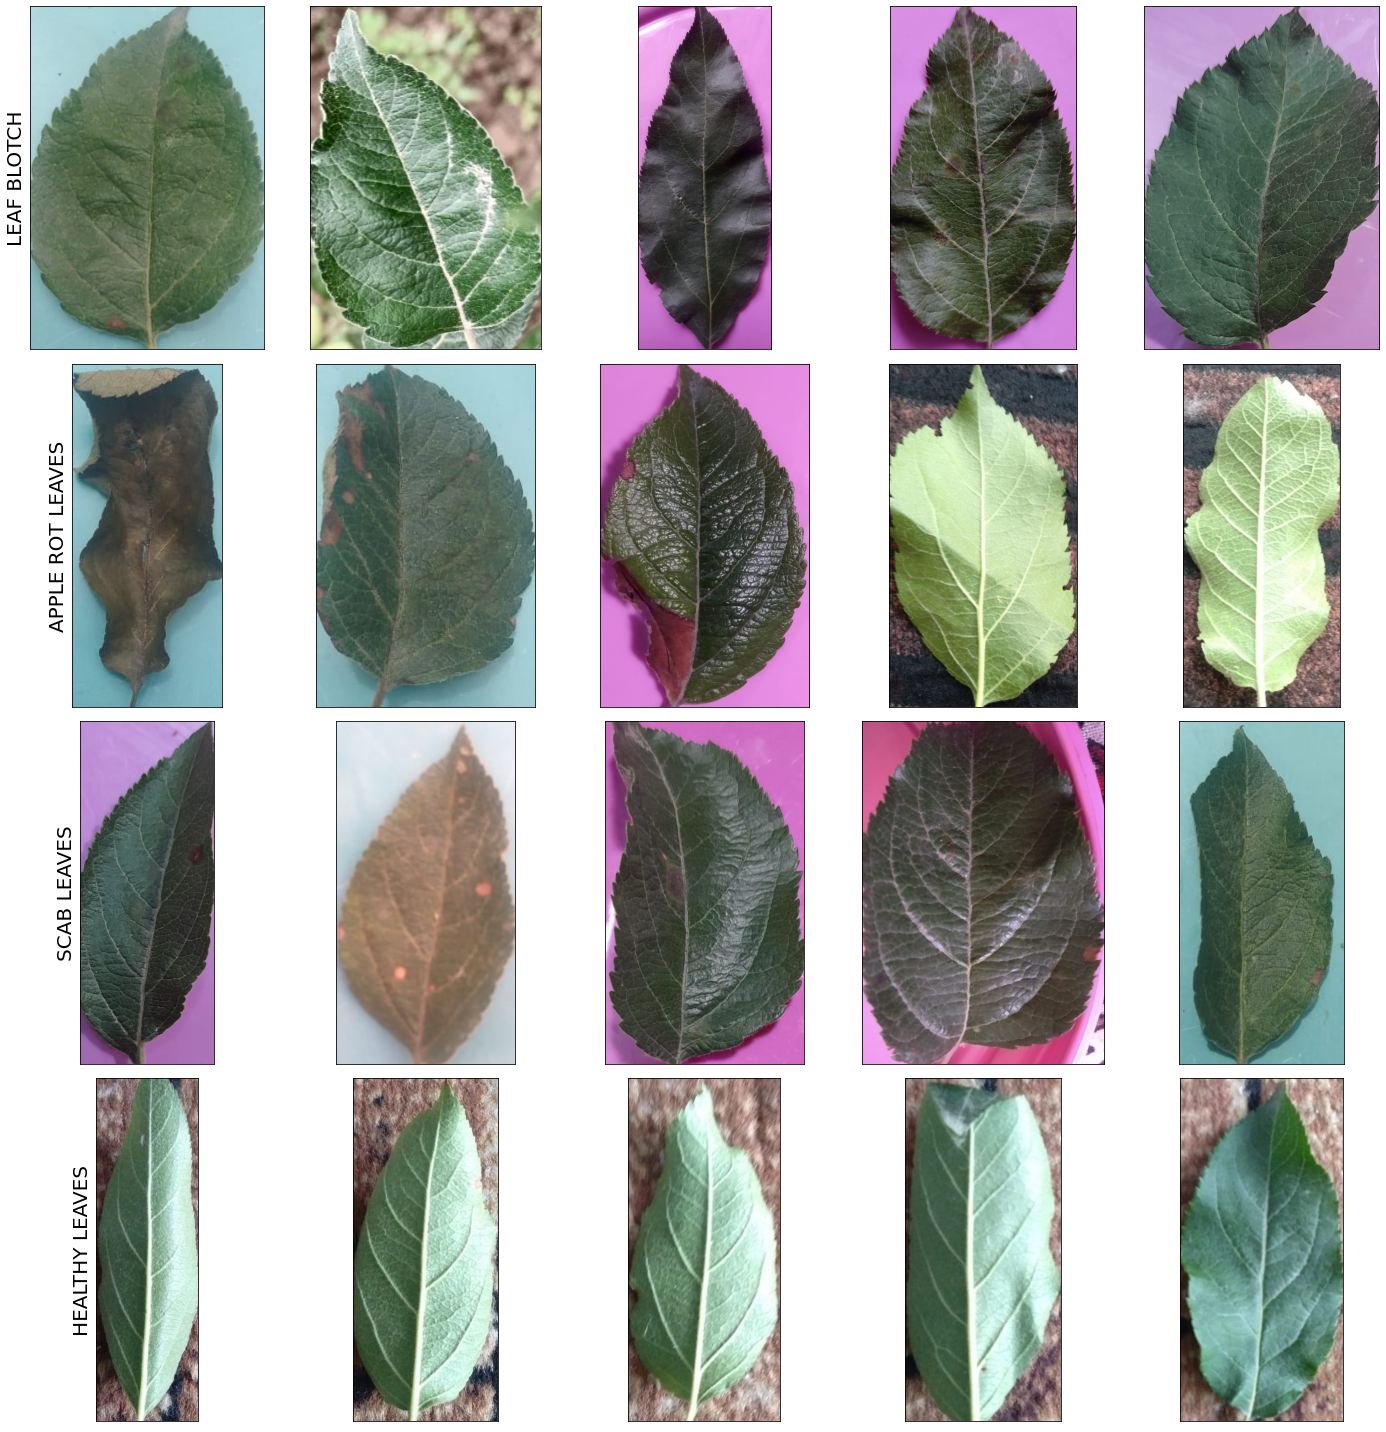

In [ ]:
# displaying image samples
plt.figure(figsize=(20,20),facecolor='white')


for i in range(4):
    directory = os.path.join(main_path, labels[i])
    for j in range(5):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(4, 5, i*5 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.tight_layout()
plt.show()

Leaf blotch is characterized by points of discoloration in the leaf.
Apple rot leaf have decayed leaf commonly fount in the edges of the leaf.
Scab leaves shows points of decay within the leaf.
Healthy leaves shows vibrant green leaves without damage.
Visually there are similarities between leaf scabs and blotches. this may affect the result of the modeling.

### Data Preprocessing

In [ ]:
# augmenting sample ammount

datagen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True) 
for l in labels:
  for f in df[df['label']== l]['images']:
    img = load_img(f)  
    x = img_to_array(img) 
    # Reshape the input image 
    x = x.reshape((1, ) + x.shape)  
    i = 0

    # generate 5 new augmented images 
    for batch in datagen.flow(x, batch_size = 1, 
                      save_to_dir = (main_path+"/"+l) ,  
                      save_prefix ='car', save_format ='jpeg'):
        i += 1
        if i > 5: 
            break

In [ ]:
# checking new sample ammount
print('image set: \n' + '='*50)
num_healthy= len(os.listdir(os.path.join(main_path, 'HEALTHY LEAVES')))
num_rot= len(os.listdir(os.path.join(main_path, 'APPLE ROT LEAVES')))
num_blotch= len(os.listdir(os.path.join(main_path, 'LEAF BLOTCH')))
num_scab= len(os.listdir(os.path.join(main_path, 'SCAB LEAVES')))
print(f'healthy ammount= {num_healthy}')
print(f'apple rot ammount= {num_rot}')
print(f'leaf blotch ammount= {num_blotch}')
print(f'scab leaves ammount= {num_scab}')

image set: 
healthy ammount= 321
apple rot ammount= 704
leaf blotch ammount= 757
scab leaves ammount= 1131


In [ ]:
# Fetching images directory
main_healthy = glob.glob(main_path+"/HEALTHY LEAVES/*.jpeg")
main_rot = glob.glob(main_path+"/APPLE ROT LEAVES/*.jpeg")
main_blotch = glob.glob(main_path+"/LEAF BLOTCH/*.jpeg")
main_scab = glob.glob(main_path+"/SCAB LEAVES/*.jpeg")

In [ ]:
# creating new dataframe
dfx= create_dataframe(main_healthy + main_rot + main_blotch + main_scab)
dfx= dfx.sample(frac=1, random_state=1).reset_index(drop=True)
dfx

,images,label
0,/content/drive/MyDrive/APPLE_DISEASE_DATASET/S...,SCAB LEAVES
1,/content/drive/MyDrive/APPLE_DISEASE_DATASET/A...,APPLE ROT LEAVES
2,/content/drive/MyDrive/APPLE_DISEASE_DATASET/S...,SCAB LEAVES
3,/content/drive/MyDrive/APPLE_DISEASE_DATASET/A...,APPLE ROT LEAVES
4,/content/drive/MyDrive/APPLE_DISEASE_DATASET/A...,APPLE ROT LEAVES
...,...,...
2908,/content/drive/MyDrive/APPLE_DISEASE_DATASET/S...,SCAB LEAVES
2909,/content/drive/MyDrive/APPLE_DISEASE_DATASET/A...,APPLE ROT LEAVES
2910,/content/drive/MyDrive/APPLE_DISEASE_DATASET/L...,LEAF BLOTCH
2911,/content/drive/MyDrive/APPLE_DISEASE_DATASET/H...,HEALTHY LEAVES


Train Size :  (1864, 2)


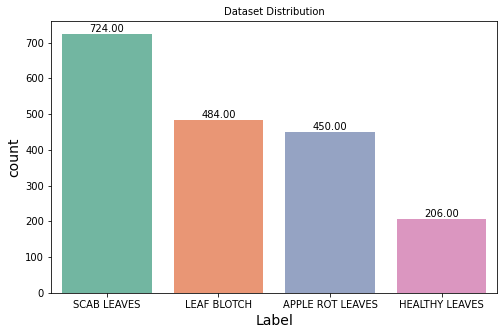

Validation Size:  (466, 2)


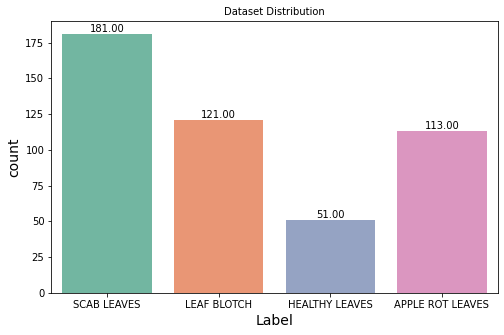

Test Size  :  (583, 2)


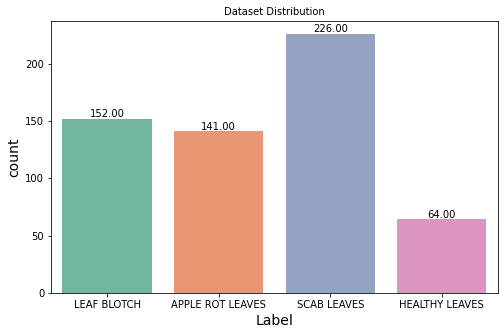

In [ ]:
# defining y
y = dfx['label']
# Splitting training, validation and test data
df_train_full, df_test, y_train_full, y_test  = train_test_split(dfx,y, test_size=0.2, random_state=42,stratify=y)
df_train, df_val,y_train,y_val = train_test_split(df_train_full,y_train_full, test_size=0.2, random_state=43,stratify=y_train_full)

print('Train Size : ', df_train.shape)
visualize_data(df_train, 'Dataset')
print('Validation Size: ', df_val.shape)
visualize_data(df_val, 'Dataset')
print('Test Size  : ', df_test.shape)
visualize_data(df_test, 'Dataset')

In [ ]:
seed_num = 32
img_width = 224
img_height = 224
batch_num = 128

In [ ]:
# augmenting image data
train_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

val_aug = ImageDataGenerator(rescale=1./255)
test_aug = ImageDataGenerator(rescale=1./255)

In [ ]:
df_train_aug = train_aug.flow_from_dataframe(
    dataframe=df_train,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=batch_num,
    shuffle=True,
    seed=seed_num)

df_val_aug = val_aug.flow_from_dataframe(
    dataframe=df_val,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=batch_num,
    shuffle=False,
    seed=seed_num)

df_test_aug = test_aug.flow_from_dataframe(
    dataframe=df_test,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=batch_num,
    shuffle=False,
    seed=seed_num)

Found 1864 validated image filenames belonging to 4 classes.
Found 466 validated image filenames belonging to 4 classes.
Found 583 validated image filenames belonging to 4 classes.


### Model Definition

For this modeling a pretrained VGG19 model will be used as part of the model.

Usage of the pretrained model is referenced from:

https://www.techrxiv.org/articles/preprint/D-KAP_A_Deep_Learning-based_Kashmiri_Apple_Plant_Disease_Prediction_Framework/21210320/1

In [ ]:
# defining callbacck
callbacks = [ 
    EarlyStopping(monitor = 'val_loss', patience = 5)
]

In [ ]:
# Defining model
model = tf.keras.models.Sequential([
    tf.keras.applications.vgg19.VGG19(include_top=False,weights='imagenet',input_shape=(img_height,img_width, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.layers[0].trainable=False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 21,632,292
Trainable params: 1,607,908
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
# Compiling model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

### Model Training

In [ ]:
# Defining plot function
def la_plot(history,epoch):

    fig, ax = plt.subplots(ncols=2,figsize=(16,5))
    ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
    ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
    ax[0].set_title('Loss')
    ax[0].legend()
    ax[0].set_xlabel('Epoch')

    ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
    ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
    ax[1].set_title('Accuracy')
    ax[1].legend()
    ax[1].set_xlabel('Epoch')

    plt.show()

In [ ]:
# Training the model
epochs=20

history = model.fit(
    df_train_aug,
    validation_data=df_val_aug,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/20
30/30 [==============================] - 34s 986ms/step - loss: 1.4905 - accuracy: 0.3782 - val_loss: 1.0959 - val_accuracy: 0.4721
Epoch 2/20
30/30 [==============================] - 29s 979ms/step - loss: 1.1163 - accuracy: 0.4651 - val_loss: 0.9764 - val_accuracy: 0.5536
Epoch 3/20
30/30 [==============================] - 29s 982ms/step - loss: 1.0322 - accuracy: 0.5247 - val_loss: 1.0338 - val_accuracy: 0.5107
Epoch 4/20
30/30 [==============================] - 29s 976ms/step - loss: 0.9927 - accuracy: 0.5467 - val_loss: 1.0059 - val_accuracy: 0.5064
Epoch 5/20
30/30 [==============================] - 29s 977ms/step - loss: 0.9974 - accuracy: 0.5327 - val_loss: 0.8879 - val_accuracy: 0.6009
Epoch 6/20
30/30 [==============================] - 29s 981ms/step - loss: 0.9447 - accuracy: 0.5692 - val_loss: 0.8455 - val_accuracy: 0.6588
Epoch 7/20
30/30 [==============================] - 29s 969ms/step - loss: 0.8866 - accuracy: 0.6068 - val_loss: 0.8069 - val_accuracy: 0.6567

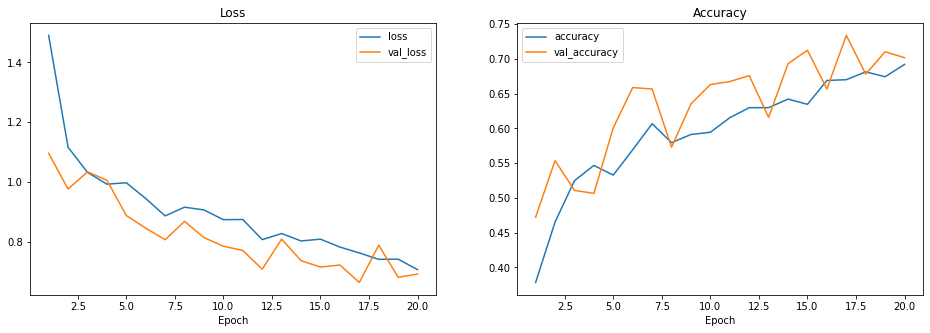

In [ ]:
# plotting loss and accuracy
la_plot(history,20)

Results from the base model shows an explosive gradient. Improvements to the model will be applied.

### Model Improvements & Evaluations

the first improvements is to add more neurons to the hidden layer of the model.

In [ ]:
# Defining model
model1 = tf.keras.models.Sequential([
    tf.keras.applications.vgg19.VGG19(include_top=False,weights='imagenet',input_shape=(img_height,img_width, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model1.layers[0].trainable=False
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               3211392   
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
Total params: 23,244,292
Trainable params: 3,219,908
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
# Compiling model
model1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
              

In [ ]:
# training the model
epochs=20

history1 = model1.fit(
    df_train_aug,
    validation_data=df_val_aug,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/20
30/30 [==============================] - 31s 1s/step - loss: 2.0833 - accuracy: 0.3648 - val_loss: 1.1304 - val_accuracy: 0.5172
Epoch 2/20
30/30 [==============================] - 29s 973ms/step - loss: 1.1133 - accuracy: 0.4785 - val_loss: 0.9741 - val_accuracy: 0.5944
Epoch 3/20
30/30 [==============================] - 30s 984ms/step - loss: 1.0142 - accuracy: 0.5381 - val_loss: 0.9672 - val_accuracy: 0.5687
Epoch 4/20
30/30 [==============================] - 29s 974ms/step - loss: 1.0108 - accuracy: 0.5166 - val_loss: 0.8941 - val_accuracy: 0.6180
Epoch 5/20
30/30 [==============================] - 29s 974ms/step - loss: 0.9546 - accuracy: 0.5660 - val_loss: 0.9024 - val_accuracy: 0.5858
Epoch 6/20
30/30 [==============================] - 29s 971ms/step - loss: 0.9301 - accuracy: 0.5762 - val_loss: 0.8524 - val_accuracy: 0.5923
Epoch 7/20
30/30 [==============================] - 29s 972ms/step - loss: 0.9442 - accuracy: 0.5590 - val_loss: 0.9348 - val_accuracy: 0.5966
Ep

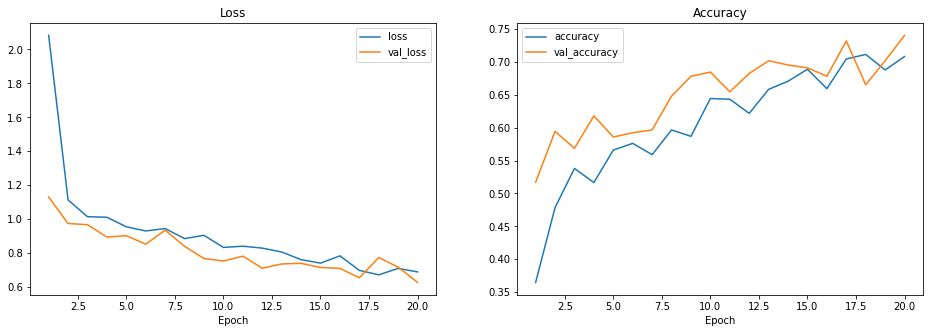

In [ ]:
# Plotting result
la_plot(history1,20)

The model shows a slight explosive gradient. for the next improvements the learning rate of the model will be set.

In [ ]:
# Defining model
model2 = tf.keras.models.Sequential([
    tf.keras.applications.vgg19.VGG19(include_top=False,weights='imagenet',input_shape=(img_height,img_width, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model2.layers[0].trainable=False
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               3211392   
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 4)                 260       
                                                                 
Total params: 23,244,292
Trainable params: 3,219,908
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
# compiling model
opt= tf.keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
# training the model
epochs=20

history2 = model2.fit(
    df_train_aug,
    validation_data=df_val_aug,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/20
30/30 [==============================] - 31s 1s/step - loss: 1.2578 - accuracy: 0.3959 - val_loss: 1.1375 - val_accuracy: 0.4185
Epoch 2/20
30/30 [==============================] - 29s 975ms/step - loss: 1.1541 - accuracy: 0.4335 - val_loss: 1.0752 - val_accuracy: 0.5300
Epoch 3/20
30/30 [==============================] - 29s 973ms/step - loss: 1.0714 - accuracy: 0.5113 - val_loss: 1.0067 - val_accuracy: 0.5150
Epoch 4/20
30/30 [==============================] - 29s 973ms/step - loss: 1.0268 - accuracy: 0.5338 - val_loss: 1.0871 - val_accuracy: 0.4421
Epoch 5/20
30/30 [==============================] - 29s 971ms/step - loss: 1.0407 - accuracy: 0.5150 - val_loss: 0.9238 - val_accuracy: 0.6073
Epoch 6/20
30/30 [==============================] - 29s 978ms/step - loss: 0.9723 - accuracy: 0.5494 - val_loss: 0.8879 - val_accuracy: 0.5966
Epoch 7/20
30/30 [==============================] - 29s 970ms/step - loss: 0.9467 - accuracy: 0.5595 - val_loss: 0.9173 - val_accuracy: 0.5923
Ep

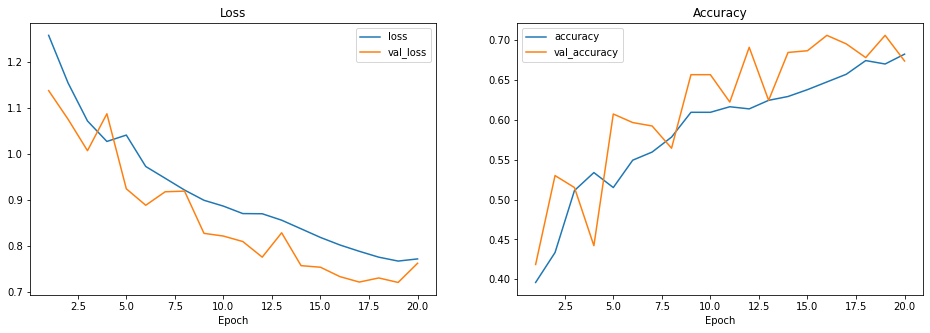

In [ ]:
# Plotting result
la_plot(history2,20)

The resuting model still shows exploding gradient. we will now add pooling to the vgg19 layer of the model.

In [ ]:
# Defining model
model3 = tf.keras.models.Sequential([
    tf.keras.applications.vgg19.VGG19(include_top=False,weights='imagenet',input_shape=(img_height,img_width, 3),pooling='avg'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model3.layers[0].trainable=False
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 4)                 260       
                                                                 
Total params: 20,098,564
Trainable params: 74,180
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
# compiling model
opt= tf.keras.optimizers.Adam(learning_rate=0.0001)
model3.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
# training the model
epochs=20

history3 = model3.fit(
    df_train_aug,
    validation_data=df_val_aug,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/20
30/30 [==============================] - 31s 1s/step - loss: 1.3392 - accuracy: 0.3841 - val_loss: 1.2989 - val_accuracy: 0.4142
Epoch 2/20
30/30 [==============================] - 30s 986ms/step - loss: 1.2925 - accuracy: 0.3889 - val_loss: 1.2868 - val_accuracy: 0.4077
Epoch 3/20
30/30 [==============================] - 30s 992ms/step - loss: 1.2809 - accuracy: 0.3927 - val_loss: 1.2747 - val_accuracy: 0.4013
Epoch 4/20
30/30 [==============================] - 30s 986ms/step - loss: 1.2720 - accuracy: 0.3895 - val_loss: 1.2657 - val_accuracy: 0.4056
Epoch 5/20
30/30 [==============================] - 30s 990ms/step - loss: 1.2635 - accuracy: 0.3965 - val_loss: 1.2555 - val_accuracy: 0.4163
Epoch 6/20
30/30 [==============================] - 30s 988ms/step - loss: 1.2530 - accuracy: 0.4013 - val_loss: 1.2482 - val_accuracy: 0.4227
Epoch 7/20
30/30 [==============================] - 29s 980ms/step - loss: 1.2488 - accuracy: 0.3981 - val_loss: 1.2383 - val_accuracy: 0.4163
Ep

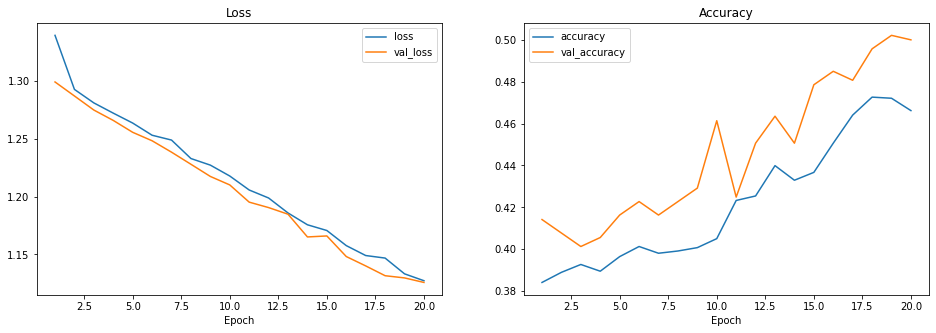

In [ ]:
# Plotting result
la_plot(history3,20)

Resulting model shows good loss but shows low accuracy. next we will try batch regularization and gradient clipping.

In [ ]:
# Defining model
model4 = tf.keras.models.Sequential([
    tf.keras.applications.vgg19.VGG19(include_top=False,weights='imagenet',input_shape=(img_height,img_width, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer='l1'),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer='l1'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model4.layers[0].trainable=False
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               3211392   
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_14 (Dense)            (None, 4)                 516       
                                                      

In [ ]:
# compiling model
opt= tf.keras.optimizers.experimental.Adam(clipvalue=0.1, learning_rate=0.0001)
model4.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
# training the model
epochs=20

history4 = model4.fit(
    df_train_aug,
    validation_data=df_val_aug,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/20
30/30 [==============================] - 32s 977ms/step - loss: 225.3141 - accuracy: 0.3702 - val_loss: 187.4994 - val_accuracy: 0.2597
Epoch 2/20
30/30 [==============================] - 30s 985ms/step - loss: 155.3432 - accuracy: 0.4721 - val_loss: 125.3201 - val_accuracy: 0.2597
Epoch 3/20
30/30 [==============================] - 30s 986ms/step - loss: 100.5347 - accuracy: 0.5043 - val_loss: 77.2205 - val_accuracy: 0.5236
Epoch 4/20
30/30 [==============================] - 30s 986ms/step - loss: 60.0301 - accuracy: 0.5483 - val_loss: 44.6073 - val_accuracy: 0.4163
Epoch 5/20
30/30 [==============================] - 30s 986ms/step - loss: 34.9533 - accuracy: 0.5703 - val_loss: 27.4443 - val_accuracy: 0.4142
Epoch 6/20
30/30 [==============================] - 30s 987ms/step - loss: 23.7595 - accuracy: 0.5574 - val_loss: 21.1607 - val_accuracy: 0.4614
Epoch 7/20
30/30 [==============================] - 30s 984ms/step - loss: 18.9862 - accuracy: 0.5794 - val_loss: 17.5975 - v

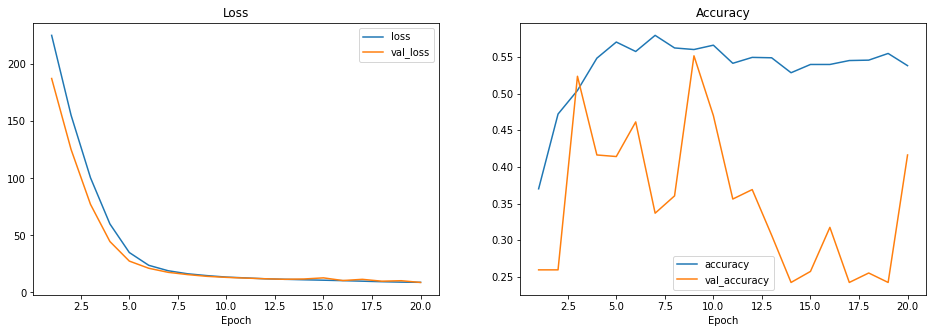

In [ ]:
# Plotting result
la_plot(history4,20)

Model shows exploding gradient on the validation accuracy. this change will not be kept. we will now try to increase the epoch of the 2nd improvement model.

In [ ]:
# Defining model
model5 = tf.keras.models.Sequential([
    tf.keras.applications.vgg19.VGG19(include_top=False,weights='imagenet',input_shape=(img_height,img_width, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model5.layers[0].trainable=False
model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_18 (Dense)            (None, 128)               3211392   
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 4)                 260       
                                                                 
Total params: 23,244,292
Trainable params: 3,219,908
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
# compiling model
opt= tf.keras.optimizers.Adam(learning_rate=0.0001)
model5.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
# training the model
epochs=250

history5 = model5.fit(
    df_train_aug,
    validation_data=df_val_aug,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/250
30/30 [==============================] - 31s 1s/step - loss: 1.2794 - accuracy: 0.3777 - val_loss: 1.1335 - val_accuracy: 0.4270
Epoch 2/250
30/30 [==============================] - 30s 988ms/step - loss: 1.1269 - accuracy: 0.4555 - val_loss: 1.0366 - val_accuracy: 0.4764
Epoch 3/250
30/30 [==============================] - 30s 984ms/step - loss: 1.0497 - accuracy: 0.5177 - val_loss: 1.0041 - val_accuracy: 0.5408
Epoch 4/250
30/30 [==============================] - 30s 988ms/step - loss: 1.0224 - accuracy: 0.5236 - val_loss: 0.9392 - val_accuracy: 0.5622
Epoch 5/250
30/30 [==============================] - 30s 987ms/step - loss: 0.9745 - accuracy: 0.5472 - val_loss: 0.9313 - val_accuracy: 0.5773
Epoch 6/250
30/30 [==============================] - 30s 986ms/step - loss: 0.9695 - accuracy: 0.5617 - val_loss: 0.8928 - val_accuracy: 0.6223
Epoch 7/250
30/30 [==============================] - 30s 994ms/step - loss: 0.9324 - accuracy: 0.5783 - val_loss: 0.8598 - val_accuracy: 0.

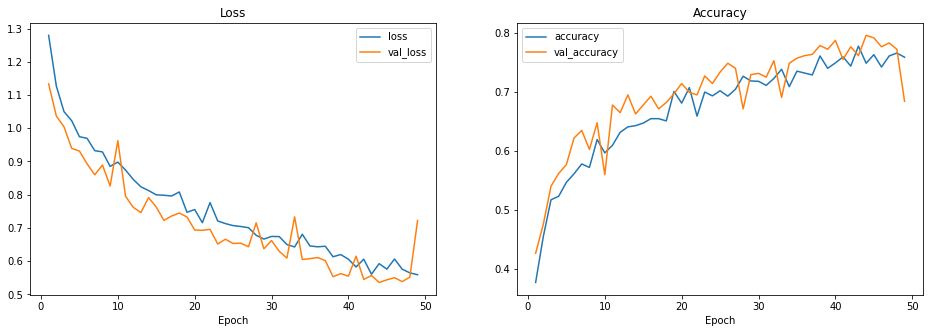

In [ ]:
# Plotting result
la_plot(history5,49)

the model shows that it just fits but shows that the validation data have lower loss and higher accuracy than the train data. but other than that fact, the model works well and will be chosen.

In [ ]:
# Freezing the final model
model5.trainable=False

In [ ]:
# Evaluating result of the final model
result_func= model5.evaluate(df_train_aug)
print('Train - Loss     : ', result_func[0])
print('Train - Accuracy : ', result_func[1])
print('')

result_func= model5.evaluate(df_val_aug)
print('val - Loss     : ', result_func[0])
print('val - Accuracy : ', result_func[1])
print('')

result_func= model5.evaluate(df_test_aug)
print('Test - Loss     : ', result_func[0])
print('Test - Accuracy : ', result_func[1])
print('')

30/30 [==============================] - 27s 906ms/step - loss: 0.6520 - accuracy: 0.7071
Train - Loss     :  0.6520479321479797
Train - Accuracy :  0.7070815563201904

8/8 [==============================] - 2s 296ms/step - loss: 0.7222 - accuracy: 0.6845
val - Loss     :  0.7222062349319458
val - Accuracy :  0.6845493316650391

10/10 [==============================] - 3s 308ms/step - loss: 0.7756 - accuracy: 0.6638
Test - Loss     :  0.7756350040435791
Test - Accuracy :  0.6638078689575195



Looking at the result of the test data evaluation, it is found that the model slightly overfits to the training data, but this is still within the treshhold. the resulting final model shows an unsatisfactory accuracy result. this may be due to inconsistency in the quality and quantity of the sample images used in training the model. similarities in the images across categories also may explain the low accuracy as all the samples are leaf images.

### Model Saving

In [ ]:
# saving model
model5.save('model_apple.h5')

### Model Inference

In [ ]:
# loading model
model_s= tf.keras.models.load_model('/content/drive/MyDrive/Apple_disease_model/model_apple.h5')

In [ ]:
# Fetching class names
class_names=df_train_aug.class_indices
class_names


{'APPLE ROT LEAVES': 0,
 'HEALTHY LEAVES': 1,
 'LEAF BLOTCH': 2,
 'SCAB LEAVES': 3}

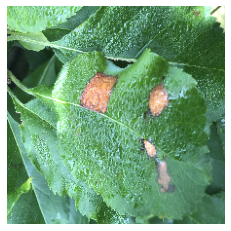

1/1 [==============================] - 0s 165ms/step
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2317224e-35]]
Apple rot leaves


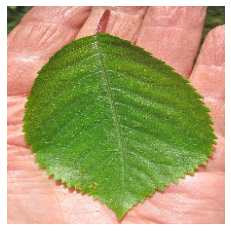

1/1 [==============================] - 0s 19ms/step
[[5.846442e-33 0.000000e+00 2.135248e-23 1.000000e+00]]
Scab leaves


In [ ]:
 # Predicting new sample image
for path in ['/content/drive/MyDrive/Apple_disease_Inference/Disease_leaf_sample.jpeg','/content/drive/MyDrive/Apple_disease_Inference/Healthy_leaf_sample.jpeg']:
  img = load_img(path, target_size=(224,224))
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0) 

  images = np.vstack([x])
  classes = model_s.predict(images)
  print(classes) 

  if classes[0][0].round() == 1:
    print('Apple rot leaves')
  elif classes[0][1].round() == 1:
    print('Healthy leaves')
  elif classes[0][2].round() == 1:
    print('Leaf blotch')
  elif classes[0][3].round() == 1:
    print('Scab leaves')
  else:
    print('invalid')

### Conclusions

1. Computer Vision model can be made using VGG19 as a base pretrained model.
2. EDA shows that the sample data labels is imbalanced. this may affect the modeling result.
3. resulting final model found the model have lower accuracy than expected. This may be due to the quality and quantity of the sample data used in training the model.
4. future improvements can be done by increasing the ammount of sample image, using a different pretrained model, and by further tuning the parameters of the model.

